# Антонов Алексей <h1> 
# Вариант 1 <h5>

<img src="1.jpg"/>
<img src="2.jpg"/>

In [264]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import scipy
import scipy.integrate as integrate
from math import sin

In [265]:
#1. Аналитическое значение интеграла
def P(x):
    return c[0] + c[1] * x + c[2] * x**2 + c[3] * x ** 3 + c[4] * x**4
print(P(2))
c = [0.6, 1.3, 0, 1.2, 1.9]
a = 1
b = 1.44
value, err = integrate.quad(P, a, b)
print(value)

24.4
3.9246449285119986


In [266]:
#2. Вычислить значение интеграла по формулам трапеций и Симпсона, считая отрезок [1,1.44] элементарным отрезком интегрирования.
#3. Найти абсолютные погрешности результатов.
trapezoid = lambda f, a, b: (b - a) * (f(a) + f(b)) / 2
simpson = lambda f, a, b: (b - a) * (f(a) + 4 * f((a + b) / 2) + f(b)) / 6
print ('Значение для метода трапеций: ', trapezoid(P, a, b))
print('Абсолютная погрешность:', abs(trapezoid(P, a, b) - value))
print ('Значение для метода Симпсона: ', simpson(P, a, b))
print('Абсолютная погрешность:', abs(simpson(P, a, b) - value))

Значение для метода трапеций:  4.229463265279999
Абсолютная погрешность: 0.3048183367680002
Значение для метода Симпсона:  3.9249060458666656
Абсолютная погрешность: 0.00026111735466693986


<img src="11.jpg"/>

In [267]:
#4.   Используя   выражение   для   остаточных   членов   интегрирования, оценить шаги интегрирования,
#при которых величина погрешности каждой квадратурной формулы будет меньше 0.0001.
# 22.8 * x**2 + 7.2 * x - Производная второго порядка
M2 = 57.6461 # max для производной второго порядка
M4 = 72.864 # max = производной четвертого порядка
h_trap = math.sqrt((0.0001 * 12) / (M2 * (b - a)))
h_simp = math.pow((0.0001 * 2880) / (M4 * (b - a)), 1 / 3) #взял более грубую оценку
print('Шаги для метода трапеций:', h_trap)
print('Количество шагов:', (b - a) / h_trap)
print('Шаги для метода Симпсона:', h_simp)
print('Количество шагов:', (b - a) / h_simp)

Шаги для метода трапеций: 0.006878271579782677
Количество шагов: 63.969559052203344
Шаги для метода Симпсона: 0.20787819352150236
Количество шагов: 2.1166241275542332


<img src="11.jpg"/>

In [268]:
#5. Вычислить значения интеграла по составной квадратурной формуле с найденным шагом
#6. Найти абсолютные погрешности результатов. 
n=64
def trapezoid_comp(f, a, b, n):
    h = (b-a) / n
    x = np.arange(a, b + h, h)
    return h * ( (f(x[0]) + f(x[n])) / 2 + sum([f(x[i]) for i in range(1, n)]))

def simpson_comp(f, a, b, n):
    h = (b-a) / n
    x = np.arange(a, b + h, h)
    gen = lambda f, x, i: 2 * f(x[i]) if i % 2 == 0 else 4 * f(x[i])
    return (h / 3) * (f(a) + sum([gen(f, x, i) for i in range(1, n)]) + f(b))

print ('Значение для метода трапеций (составной): ', trapezoid_comp(P, a, b, n))
print('Абсолютная погрешность:', abs(trapezoid_comp(P, a, b, n) - value))
print ('Значение для метода Симпсона (составной): ', simpson_comp(P, a, b, 4))
print('Абсолютная погрешность:', abs(simpson_comp(P, a, b, 4) - value))

Значение для метода трапеций (составной):  3.9247196019864
Абсолютная погрешность: 7.46734744012656e-05
Значение для метода Симпсона (составной):  3.924661248346663
Абсолютная погрешность: 1.6319834664546562e-05


<img src="3.jpg"/>
<img src="4.jpg"/>
<img src="12.jpg"/>

In [269]:
def Pk(x):
    return c[0] + c[1] * x + c[2] * x**2 + c[3] * x ** 3 + c[4] * x**4 + c[5] * x**5

def right_rect(x, a, b):
    x = np.arange(a, b + h, h)
    return h * sum([Pk(x[i]) for i in range(1, x.shape[0])])

c = [1, 0.9, 0.8, 0.7, 0.8, 1]
a = 0
b = 1
value, err = integrate.quad(Pk, a, b)
h = (b - a) / 2
M1 = 12.8

print('Аналитическое значение интеграла = ', value)
print('Значение интеграла, применяя формулу правых прямоугольников = ', right_rect(x, a, b))
print('Погрешность = ', M1 * h**2)

Аналитическое значение интеграла =  2.2183333333333333
Значение интеграла, применяя формулу правых прямоугольников =  3.509375
Погрешность =  3.2


<img src="5.jpg"/>
<img src="6.jpg"/>

Шаги для метода трапеций: 0.00010540925533894598
Количество шагов: 9486.832980505138
0.8047764893437559
Значение для метода трапеций (составной):  0.8047764796604865
Абсолютная погрешность: 9.68326940853359e-09


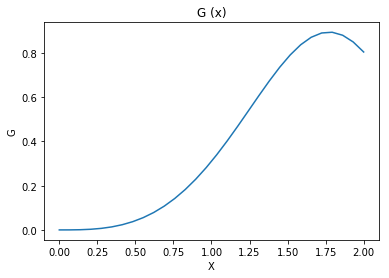

In [271]:
def f(t):
    return sin (t**2)
a = 0
x1 = 0
x2 = 2
M2 = 10.8
eps = 1e-8
value, err = integrate.quad(f, 0, 2)
h_trap = math.sqrt((eps * 12) / (M2 * (b - a)))
print('Шаги для метода трапеций:', h_trap)
print('Количество шагов:', (b - a) / h_trap)
n = 9487
print(value)
print ('Значение для метода трапеций (составной): ', trapezoid_comp(f, a, x2, n))
print('Абсолютная погрешность:', abs(trapezoid_comp(f, a, x2, n) - value))

arr = np.linspace(eps, 2, 30)
n = 10000
G = [trapezoid_comp(f, a, b, n) for b in arr]
plt.plot(arr,G)
plt.title("G (x)")
plt.xlabel("X")
plt.ylabel("G");

<img src="7.jpg"/>
<img src="13.jpg"/>

In [308]:
#Аналитическое значение интеграла
def P(x):
    return c[0] + c[1] * x + c[2] * x**2 + c[3] * x ** 3 + c[4] * x**4
c = [0.6, 1.3, 0, 1.2, 1.9]
a = 1
b = 1.44
value, err = integrate.quad(P, a, b)
print(value)

A = [[2],[1, 1],[0.55555555555556, 0.88888888888888, 0.55555555555556] , 
     [0.347854845137454, 0.652145154862546, 0.652145154862546, 0.347854845137454]]
t = [[0], [-0.577350269189626, 0.577350269189626], [-0.77459666929954, 0, 0.77459666929954], 
     [-0.861136311594052, -0.339981043584856, 0.339981043584856, 0.861136311594052]]

def Gauss(n, a, b, f):
        return ((b - a) / 2) * sum([
            A[n-1][i] * f((a + b) / 2 + ((b - a) / 2) * t[n-1][i]) 
             for i in range(n)])
errors = np.abs(np.asarray([Gauss(n, a, b, P) for n in range(1,5)]) - value)
for i in range(4):
    print('Абсолютная погрешность при ', i+1, ' узлах = ',
          errors[i])

3.9246449285119986
Абсолютная погрешность при  1  узлах =  0.15201749235199946
Абсолютная погрешность при  2  узлах =  0.00017407823644433051
Абсолютная погрешность при  3  узлах =  2.284838984678572e-11
Абсолютная погрешность при  4  узлах =  8.881784197001252e-16


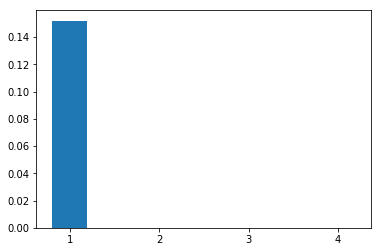

In [309]:
plot = plt.gca()
ticks = [i for i in range (1, 5)]
plot.bar(ticks, errors, width=0.4)
plot.set_xticks(ticks)
plt.show()

0.43999999999999995


TypeError: 'int' object is not subscriptable

<img src="8.jpg"/>
<img src="9.jpg"/>